# Sarima

C:\Users\DELL\AppData\Local\Temp\ipykernel_17080\1436307665.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=periods, freq='M')


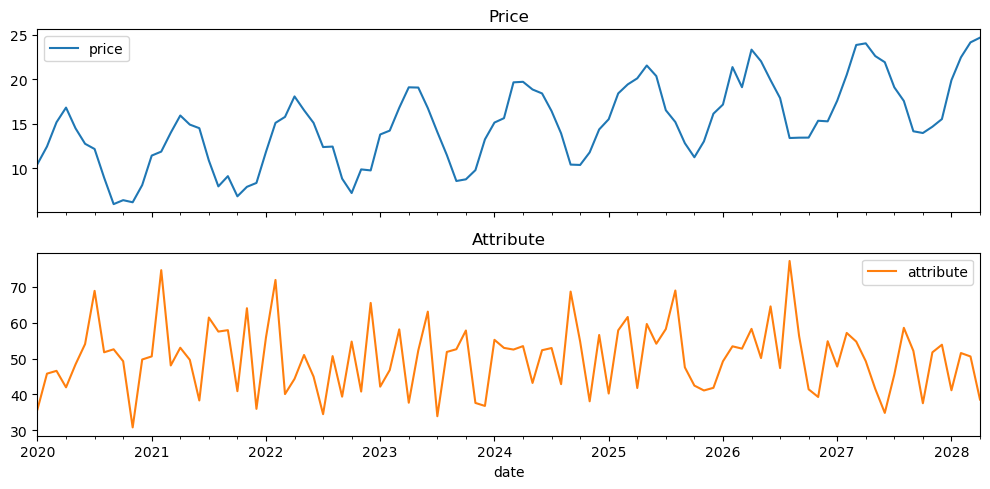

d:\Apps\Miniconda\envs\forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Apps\Miniconda\envs\forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17080\1436307665.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=ts_data.index[-1] + pd.offsets.MonthEnd(), periods=forecast_steps, freq='M')


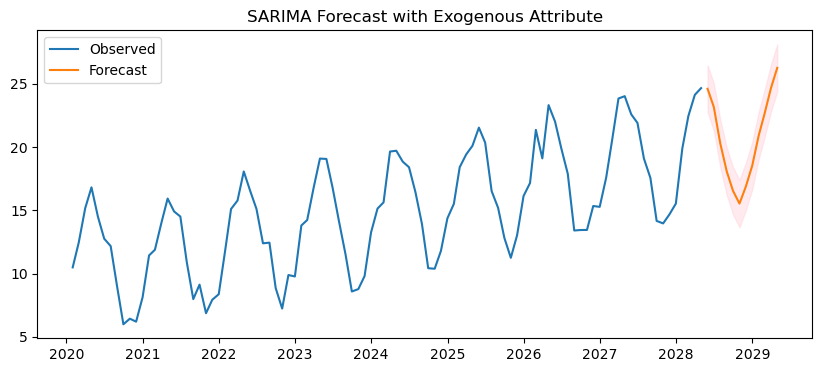

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Create example data
np.random.seed(42)
periods = 100
seasonal_period = 12
dates = pd.date_range(start='2020-01-01', periods=periods, freq='M')

# Generate synthetic "price" with seasonality + trend + noise
time = np.arange(periods)
seasonal = 10 + np.sin(2 * np.pi * time / seasonal_period) * 5
trend = 0.1 * time
noise = np.random.normal(0, 1, periods)
price = seasonal + trend + noise

# Create an exogenous "attribute" feature
attribute = np.random.normal(50, 10, size=periods)  # could be temperature, marketing, etc.

# Create DataFrame with columns: date, price, attribute
ts_data = pd.DataFrame({
    'date': dates,
    'price': price,
    'attribute': attribute
})
ts_data.set_index('date', inplace=True)

# Step 2: Plot data
ts_data[['price', 'attribute']].plot(subplots=True, figsize=(10, 5), title=['Price', 'Attribute'])
plt.tight_layout()
plt.show()

# Step 3: Fit SARIMA model with exogenous variable
model = SARIMAX(
    ts_data['price'],
    exog=ts_data[['attribute']],  # Must be 2D
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, seasonal_period),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Step 4: Forecast future values using future exog values
forecast_steps = 12
future_dates = pd.date_range(start=ts_data.index[-1] + pd.offsets.MonthEnd(), periods=forecast_steps, freq='M')

# Generate future attribute values (in real case, you need this from actual data or prediction)
future_attribute = np.random.normal(50, 10, size=forecast_steps)

# Forecast
forecast = results.get_forecast(steps=forecast_steps, exog=future_attribute.reshape(-1, 1))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 5: Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(ts_data['price'], label='Observed')
plt.plot(future_dates, forecast_mean, label='Forecast')
plt.fill_between(future_dates,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast with Exogenous Attribute')
plt.show()


# H model

In [2]:
import numpy as np
import pandas as pd
import os


from datasetsforecast.hierarchical import HierarchicalData
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import  BottomUp, TopDown, MiddleOut, MinTrace, ERM
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive
from hierarchicalforecast.evaluation import HierarchicalEvaluation

from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') 

d:\Apps\Miniconda\envs\forecast\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
